In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
orig_dir = '/content/drive/My Drive/Bicycle and Motor.v1i.tensorflow'

In [4]:
import shutil
import os

shutil.copytree(os.path.join(orig_dir), "/content/Data")

'/content/Data'

In [5]:
# Tạo dữ liệu X_train, y_train
image_folder_train = '/content/Data/train'

df_train = pd.read_csv('/content/Data/train/_annotations.csv')

X_train = []
y_train = []

In [6]:
import cv2
for index, row in df_train.iterrows():
    image_path = os.path.join(image_folder_train, row['filename'])
    img = cv2.imread(image_path)

    X_train.append(img)
    y_train.append(row['class'])

In [7]:
# Tạo dữ liệu X_test, y_test
image_folder_test = '/content/Data/valid'

df_test = pd.read_csv('/content/Data/valid/_annotations.csv')

X_test = []
y_test = []

In [8]:
import cv2
for index, row in df_test.iterrows():
    image_path = os.path.join(image_folder_test, row['filename'])
    img = cv2.imread(image_path)

    X_test.append(img)
    y_test.append(row['class'])

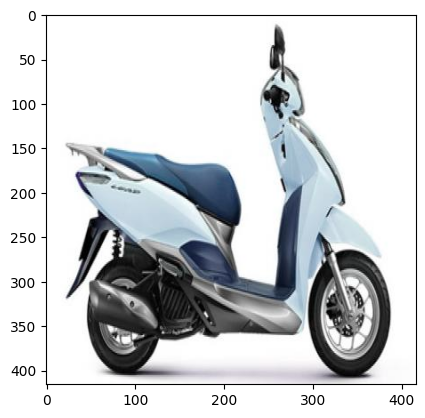

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

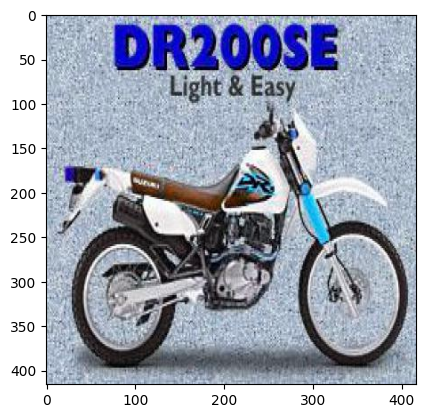

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape, y_train.shape

((625, 416, 416, 3), (625,))

In [12]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape, y_test.shape

((275, 416, 416, 3), (275,))

Text(0.5, 1.0, 'Motor')

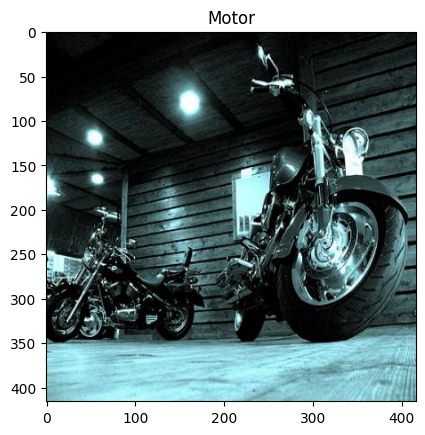

In [13]:
plt.imshow(X_train[17], cmap = plt.cm.binary)
plt.title(y_train[17])

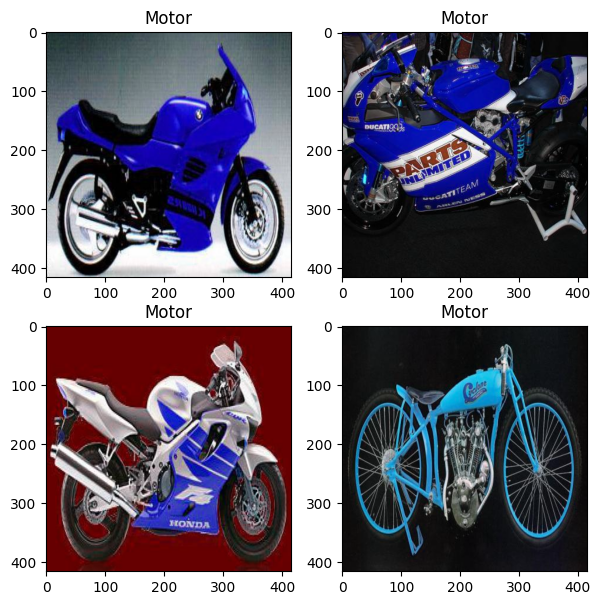

In [14]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Label Encoder cho y_train, y_test
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# OneHotEncoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [16]:
y_train[0]

array([0., 1.], dtype=float32)

In [17]:
y_train.shape

(625, 2)

In [18]:
X_train.min(), X_train.max()

(0, 255)

In [19]:
# Đưa khoảng giá trị của X về khoảng 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

BUILD MODEL

In [20]:
tf.random.set_seed(42)

# create the model
inputs = tf.keras.Input(shape=(None, None, 3))
x = tf.keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # nếu ko có sparse thì dữ liệu p là one-hot encoding
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
history = model.fit(X_train, y_train,
                                epochs =100,
                                validation_data=(X_test, y_test))


Epoch 1/100
20/20 [==============================] - 102s 5s/step - loss: 0.6925 - accuracy: 0.5248 - val_loss: 0.6908 - val_accuracy: 0.5382
Epoch 2/100
20/20 [==============================] - 84s 4s/step - loss: 0.6891 - accuracy: 0.5568 - val_loss: 0.6849 - val_accuracy: 0.6727
Epoch 3/100
20/20 [==============================] - 85s 4s/step - loss: 0.6803 - accuracy: 0.6272 - val_loss: 0.6697 - val_accuracy: 0.6545
Epoch 4/100
20/20 [==============================] - 85s 4s/step - loss: 0.6653 - accuracy: 0.6704 - val_loss: 0.6422 - val_accuracy: 0.7127
Epoch 5/100
20/20 [==============================] - 93s 5s/step - loss: 0.6370 - accuracy: 0.6768 - val_loss: 0.6177 - val_accuracy: 0.6909
Epoch 6/100
20/20 [==============================] - 86s 4s/step - loss: 0.5973 - accuracy: 0.7120 - val_loss: 0.5631 - val_accuracy: 0.7418
Epoch 7/100
20/20 [==============================] - 84s 4s/step - loss: 0.5383 - accuracy: 0.7472 - val_loss: 0.5050 - val_accuracy: 0.7418
Epoch 8/100


In [21]:
model.save('model-classifier1.h5')
shutil.move('model-classifier1.h5', '/content/drive/MyDrive/model-classifier1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/model-classifier1.h5'

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 16)    448       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 16)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 16)    0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 16)                0     

In [23]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 10s 927ms/step - loss: 0.3097 - accuracy: 0.8873


[0.3096882700920105, 0.8872727155685425]

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.692463,0.5248,0.690781,0.538182
1,0.689112,0.5568,0.684919,0.672727
2,0.680346,0.6272,0.669678,0.654545
3,0.665298,0.6704,0.642236,0.712727
4,0.637017,0.6768,0.617678,0.690909
...,...,...,...,...
95,0.316259,0.8704,0.320982,0.876364
96,0.318038,0.8672,0.320970,0.872727
97,0.314299,0.8720,0.320344,0.869091
98,0.315429,0.8752,0.343169,0.843636


<Axes: >

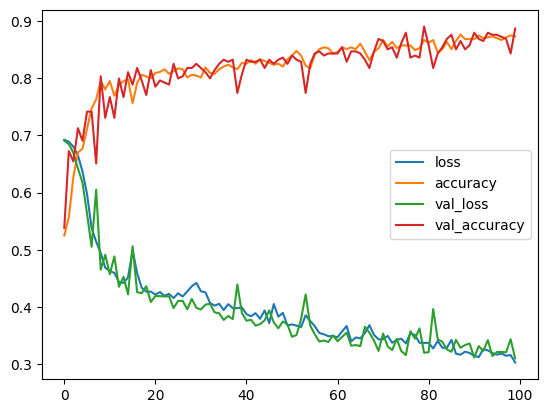

In [25]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

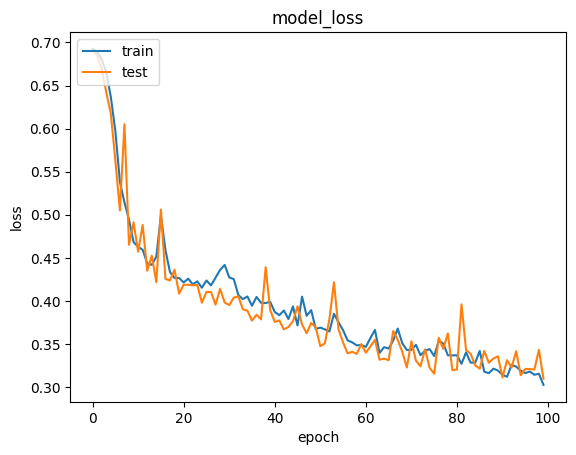

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'], loc='upper left')
plt.show